In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os
from pathlib import Path

PATH = Path(os.getcwd())#.parent

sns.set_theme()
sns.set_palette("gray")

# Classification

In [3]:
datasets = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
cls_methods = ["decision_tree", "logit", "nb"]
xai_methods = ["LIME", "SHAP", "LINDA", "ACV"]

heuristics_dicts = []
for data in datasets:
    for cls in cls_methods:
        with open(os.path.join(PATH, data, cls, "heuristics.json")) as f:
            heuristics = json.load(f)
        heuristics_dicts.append(heuristics)
        
heuristics = pd.DataFrame.from_dict(heuristics_dicts)
print("Missing Values in Results:", heuristics.ACV_Percentile.isna().sum())
heuristics

Missing Values in Results: 0


,SHAP_Percentile,True K,SHAP_K,SHAP_F1,SHAP_Precision,SHAP_Recall,Data,Model,LIME_Percentile,LIME_K,...,LINDA_Percentile,LINDA_K,LINDA_F1,LINDA_Precision,LINDA_Recall,ACV_Percentile,ACV_K,ACV_F1,ACV_Precision,ACV_Recall
0,all,2.0,1.0,0.666667,1.000000,0.500000,breast_cancer,decision_tree,all,1.0,...,0.05,1.0,NaN,0.000000,0.000000,all,2.0,0.166667,0.166667,0.166667
1,0.4,4.0,4.0,0.470588,1.000000,0.307692,breast_cancer,logit,0.5,9.0,...,0.05,1.5,NaN,0.000000,0.000000,0.05,2.0,0.333333,0.500000,0.250000
2,0.05,1.0,1.0,NaN,0.000000,0.000000,breast_cancer,nb,0.5,12.0,...,0.05,3.0,NaN,0.000000,0.000000,0.05,2.0,NaN,0.000000,0.000000
3,all,4.0,1.0,0.400000,1.000000,0.250000,compas,decision_tree,0.45,3.0,...,all,1.0,0.216346,0.225000,0.208333,all,1.0,0.400000,1.000000,0.250000
4,0.05,1.0,1.0,NaN,0.000000,0.000000,compas,logit,0.05,1.0,...,0.05,1.0,NaN,0.000000,0.000000,0.05,2.0,NaN,0.000000,0.000000
5,all,1.0,1.0,1.000000,1.000000,1.000000,compas,nb,0.05,1.0,...,all,20.0,0.095238,0.050000,1.000000,all,1.0,1.000000,1.000000,1.000000
6,0.3,4.0,2.0,0.666667,1.000000,0.500000,diabetes,decision_tree,0.3,2.0,...,0.5,2.5,0.500000,0.500000,0.500000,all,2.0,0.400000,0.500000,0.333333
7,0.25,1.0,1.0,0.588235,0.416667,1.000000,diabetes,logit,0.05,1.0,...,0.5,2.0,0.333333,0.250000,0.500000,0.05,0.5,NaN,0.000000,0.000000
8,0.05,1.0,1.0,1.000000,1.000000,1.000000,diabetes,nb,0.05,1.0,...,0.05,1.0,1.000000,1.000000,1.000000,0.05,0.0,NaN,0.000000,0.000000
9,0.4,8.0,1.0,0.295858,1.000000,0.173611,income,decision_tree,0.5,3.0,...,all,1.0,0.222222,1.000000,0.125000,all,1.0,0.211180,1.000000,0.118056


[(0.05, 33), ('all', 28), (0.5, 7), (0.4, 3), (0.3, 3), (0.2, 3), (0.45, 2), (0.35000000000000003, 2), (0.1, 2), (0.25, 1)]


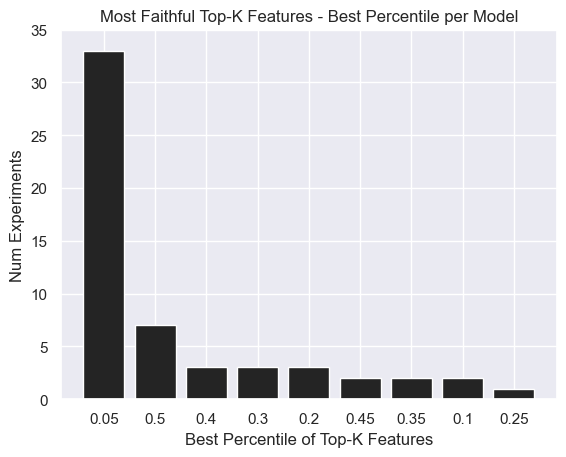

In [4]:
cls_percents = heuristics[["SHAP_Percentile", "LIME_Percentile", "LINDA_Percentile", "ACV_Percentile"]].values.flatten()
w = Counter(cls_percents)
w=w.most_common()

print(w)

x_s = []
y_s = []
for pair in w:
    key = pair[0]
    if type(key)==float:
        key=round(key,2)
        key=str(key)
        x_s.append(key)
        y_s.append(pair[1])
        
plt.bar(x_s, y_s)
plt.title("Most Faithful Top-K Features - Best Percentile per Model")
plt.xlabel("Best Percentile of Top-K Features")
plt.ylabel("Num Experiments")
plt.ylim(0,35)
plt.savefig(os.path.join('figures', "perturbation_fid", "heuristics_results.pdf"), format='pdf')

w_cls = w

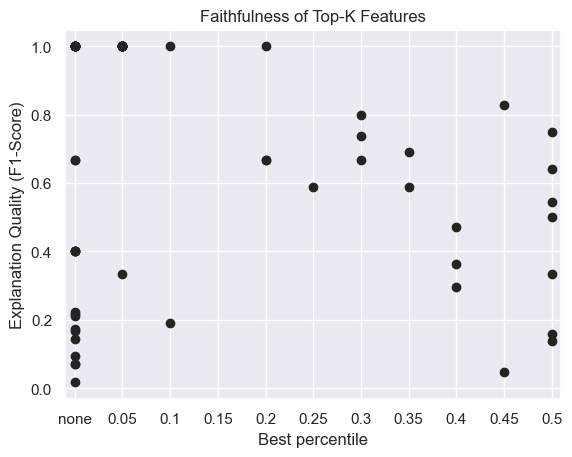

In [5]:
quality = heuristics[["SHAP_F1", "LIME_F1", "LINDA_F1", "ACV_F1"]].values.flatten()
n_percents = []
for value in cls_percents:
    if type(value)==float:
        value=round(value,2)
    else:
        value=0
    n_percents.append(value)

labels = ["none"]
labels.extend(np.arange(0.05, 0.55, 0.05).round(2))
  
plt.scatter(n_percents, quality)
plt.xlim(-0.01, 0.51)
plt.xticks(np.arange(0, 0.55, 0.05), labels)
plt.title("Faithfulness of Top-K Features")
plt.xlabel("Best percentile")
plt.ylabel("Explanation Quality (F1-Score)")
plt.show()